# **Cleaning and Performing Exploratory Data Analysis**

# Problem Statemet:
## **Analysing** **and** **Estimating** **the** **price** **of** **Diamonds by comparing various features**

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing necessary libraries

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
Diamond_Data_Frame = pd.read_csv("/diamond.csv")
df = Diamond_Data_Frame.copy()
df

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,43892,3.54,60.8,57,2757,5.75,5.76,3.5
53936,53937,0.72,Good,D,SI1,35532,3.51,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.7,Very Good,D,SI1,32133,3.27,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,44248,4.03,61,58,2757,6.15,6.12,3.74


## **Understanding dataset**

We consider Diamond dataset for our project. It has  53940 rows and 13 columns.
Various features present in the dataset are:

Unnamed 0:Representing the index.

carat:It is the measure of diamond's weight.

cut:It represents the cut quality of the diamond.Ranging from Fair to Ideal.

color:It is the color of the diamond.It is ranging from D to J.

clarity:Diamond "clarity" refers to the degree to which a diamond is free from internal inclusions and external blemishes

average us salary:Average salary of United States

numer of diamonds mined:Represents the numer of diamonds mined

depth:Represents the height of the diamond measured from a table.

table:Represents the width of the diamond table

price:Denotes the price of the diamond.It is the target variable

x:It represents the length of the diamond

y:It represents the width of the diamond

z:It represents the depth of the diamond in millimeters



In [243]:
#Dimensions of the dataframe
df.shape

(53940, 13)

In [244]:
#Various features in the dataset
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'average us salary',
       'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x',
       'y', 'z'],
      dtype='object')


## **Missing Value Analysis**


In [245]:
# EDA - Identifying Null values
df.isnull().sum()

Unnamed: 0                              377
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64

By using the isnull() method we can identify null values  present in the  dataset.

## **Handling null values**

In [246]:
# handling null values.
df = df.dropna() #Using the dropna() drop any null values present in the dataset
df

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,43892,3.54,60.8,57,2757,5.75,5.76,3.5
53936,53937,0.72,Good,D,SI1,35532,3.51,63.1,55,2757,5.69,5.75,3.61
53937,53938,0.7,Very Good,D,SI1,32133,3.27,62.8,60,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,44248,4.03,61,58,2757,6.15,6.12,3.74


In [247]:
#Checking whether null values are present
df.isnull().sum()

Unnamed: 0                             0
carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64

All the null values are dropped

## **Idenifiying duplicates in a dataset**

In [248]:
#  Checking for Duplicate values
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Unnamed: 0, carat, cut, color, clarity, average us salary, number of diamonds mined (millions), depth, table, price, x, y, z]
Index: []


No duplicates identified

## **Drop "Unnamed: 0" column since alreay index is present**

In [249]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

<ipython-input-249-89208698a9a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0'], axis = 1, inplace = True)


,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,43892,3.54,60.8,57,2757,5.75,5.76,3.5
53936,0.72,Good,D,SI1,35532,3.51,63.1,55,2757,5.69,5.75,3.61
53937,0.7,Very Good,D,SI1,32133,3.27,62.8,60,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,44248,4.03,61,58,2757,6.15,6.12,3.74


## **Identifiying different datatypes of the features**

In [250]:
# Data types of dataframe
df.dtypes

carat                                   object
cut                                     object
color                                   object
clarity                                 object
average us salary                        int64
number of diamonds mined (millions)    float64
depth                                   object
table                                   object
price                                   object
x                                       object
y                                       object
z                                       object
dtype: object

## **Anomaly Detection**


In [251]:
# EDA - checking false data entries in dataframe
print(np.unique(df['average us salary']))
print(np.unique(df['number of diamonds mined (millions)']))
print(np.unique(df['depth']))
print(np.unique(df['table']))
print(np.unique(df['price']))
print(np.unique(df['x']))
print(np.unique(df['y']))
print(np.unique(df['z']))
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

[30000 30002 30003 ... 48997 48998 48999]
[0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87
 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01
 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15
 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29
 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41 1.42 1.43
 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55 1.56 1.57
 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71
 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85
 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97 1.98 1.99
 2.   2.01 2.02 2.03 2.04 2.05 2.06 2.07 2.08 2.09 2.1  2.11 2.12 2.13
 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21 2.22 2.23 2.24 2.25 2.26 2.27
 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39 2.4  2.41
 2.42 2.43 2.44 2.45 2.46 2.47 2.48

We can observe various anomalies("True","False","Maybe") are present in the dataset.
We can aso see that there is inconsistency in the categorical values like the words "VERY GOOD" and "Very good" are same .We need to handle the mismatched strings as well.

## **Data** **Validation** **for** **numeric** **columns**
Identifiying the false entries and dropping them

In [252]:
# CLEANING - Handling False data entries of numerical columns
false_data_col = ['carat','average us salary','number of diamonds mined (millions)','depth','table','price','x','y','z']
false_df = df.copy()
for i in false_data_col:
   false_df[i]=pd.to_numeric(false_df[i],errors='coerce')
   false_df.dropna(subset = false_data_col, inplace= True)
df = false_df
df


,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [253]:
#Checking if still any false entries are present in the data
print(np.unique(df['average us salary']))

[30000 30002 30003 ... 48997 48998 48999]


## **Standardizing text data**

The columns "cut" "color" and "clarity" have mismatched strings which we are handling by converting all the values into uppercase to maintain consistency in the data.


In [254]:
#Cleaning - Mismatched columns
mismatched_columns=['cut','color','clarity']
dfnew = df.copy()
for column in mismatched_columns:
    dfnew[column]= dfnew[column].str.upper()#Capitalizing the categorical
df = dfnew
df

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,IDEAL,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,PREMIUM,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,GOOD,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,PREMIUM,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,GOOD,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,IDEAL,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,GOOD,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,VERY GOOD,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,PREMIUM,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


## **Handling Incorrect categorical data**
We will replace the inconsistent categorical data like "True" "TRUE" "Maybe" "False" with the respective mode of the particular column

In [255]:
false_col = ['cut','color','clarity']
false_str_df = df.copy()
for j in false_col:
  false_str_df[j] = false_str_df[j].replace(['TRUE','FALSE','MAYBE'], false_str_df[j].mode()[0])
  #false_str_df.dropna(subset = false_col, inplace = True)
df = false_str_df
print(np.unique(df['cut']))
print(np.unique(df['color']))
print(np.unique(df['clarity']))

['FAIR' 'GOOD' 'IDEAL' 'PREMIUM' 'VERY GOOD']
['D' 'E' 'F' 'G' 'H' 'I' 'J']
['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


## **Data Quality Checking**

In [256]:

# List of numeric columns to check for negative values
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Check for negative values in each numeric column
for column in numeric_columns:
    negative_count = (df[column] < 0).sum()
    if negative_count > 0:
        print(f"Negative values found in column '{column}': {negative_count} occurrences.")
    else:print("No negative data found")

No negative data found
No negative data found
No negative data found
No negative data found
No negative data found
No negative data found
No negative data found


We have to makesure that there are no negative values in diamond dataset as we cannot have any dimension of diamond dataset as negative.


## **Fixing Data Types**

In [257]:
df.dtypes

carat                                  float64
cut                                     object
color                                   object
clarity                                 object
average us salary                        int64
number of diamonds mined (millions)    float64
depth                                  float64
table                                  float64
price                                  float64
x                                      float64
y                                      float64
z                                      float64
dtype: object

We can observe that after removing inconsistent data from the numeric columns all the data types of the columns are appropriate.

## **Summary Statistics**

In [258]:
# EDA - Descriptive statistics
#print(np.unique(df['carat']))
df.describe()

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
count,48831.000000,48831.000000,48831.000000,48831.000000,48831.000000,48831.000000,48831.000000,48831.000000,48831.000000
mean,0.797524,39501.573058,2.901771,61.750988,57.454414,3932.490672,5.730067,5.733603,3.538326
std,0.473602,5481.414581,1.326387,1.433879,2.230535,3990.655066,1.121161,1.144628,0.706792
min,0.200000,30000.000000,0.600000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,34759.000000,1.750000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,39528.000000,2.910000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,44218.000000,4.050000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.030000
max,5.010000,48999.000000,5.200000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## **Data Filtering**

We know that x(length) y(width) z(height) for a diamond cannot be zero so need to drop those values

In [259]:
len(df[(df['x']==0)|(df['y']==0) | (df['z'] == 0)])

19

In [260]:
df=df[(df[['x','y','z']]!=0).all(axis=1)]

Ensuring that all the 0--values are removed

In [261]:
len(df[(df['x']==0)|(df['y']==0) | (df['z'] == 0)])

0

## **Correlation analysis**

<ipython-input-262-e24b2d91cc4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),  annot=True, cmap='crest', fmt='0.2f', linewidth=0.5)


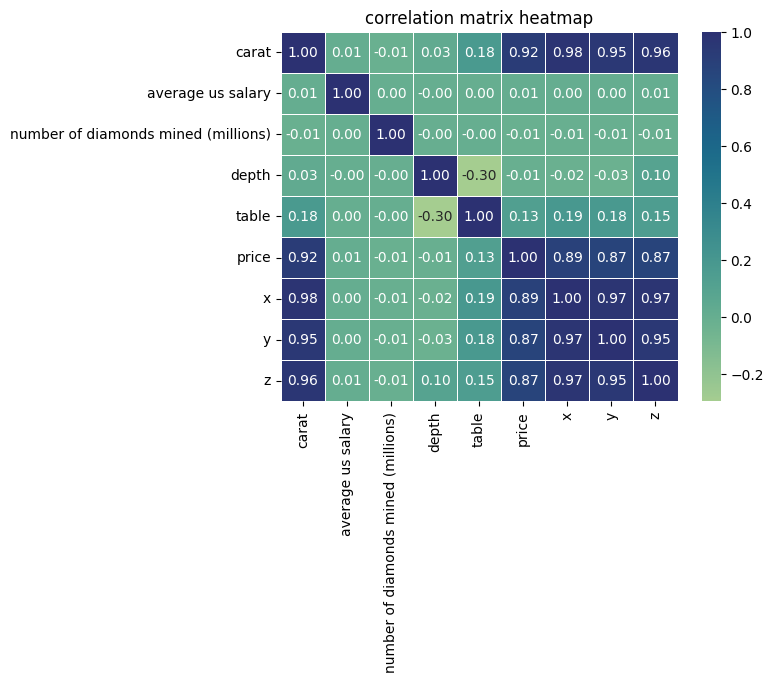

In [262]:
plt.title("correlation matrix heatmap") #Plotting correlation matrix heatmap to analyse pairwise relation between columns of dataframe.
sns.heatmap(df.corr(),  annot=True, cmap='crest', fmt='0.2f', linewidth=0.5)
plt.show()

### **Analysis from Heatmap:**

--> correlation of feature with itself is 1 as expected.

--> it is observed that price is highly correlated with carat, x, y, z subsequently.

--> depth is inversly related to price.

## **Feature Extraction**

In [263]:
# Correlation matrix of dataframe.
correlation_matrix = df[['carat','average us salary','number of diamonds mined (millions)','depth','table','price','x','y','z']].corr()
# Correlaitng features with target
corr_with_target = correlation_matrix['price'].abs()
threshold = 0.1
unrelated_features = corr_with_target[corr_with_target < threshold].index
# dropping unrelated feature for further analysis
df.drop(columns=unrelated_features, inplace=True)
print('Unrelated Features: ', unrelated_features)
print(df)


Unrelated Features:  Index(['average us salary', 'number of diamonds mined (millions)', 'depth'], dtype='object')
       carat        cut color clarity  table   price     x     y     z
0       0.23      IDEAL     E     SI2   55.0   326.0  3.95  3.98  2.43
1       0.21    PREMIUM     E     SI1   61.0   326.0  3.89  3.84  2.31
2       0.23       GOOD     E     VS1   65.0   327.0  4.05  4.07  2.31
3       0.29    PREMIUM     I     VS2   58.0   334.0  4.20  4.23  2.63
4       0.31       GOOD     J     SI2   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...     ...   ...   ...   ...
53935   0.72      IDEAL     D     SI1   57.0  2757.0  5.75  5.76  3.50
53936   0.72       GOOD     D     SI1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  VERY GOOD     D     SI1   60.0  2757.0  5.66  5.68  3.56
53938   0.86    PREMIUM     H     SI2   58.0  2757.0  6.15  6.12  3.74
53939   0.75      IDEAL     D     SI2   55.0  2757.0  5.83  5.87  3.64

[48812 rows x 9 columns]


<ipython-input-263-f3054cc69076>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=unrelated_features, inplace=True)


Data frame is updated with extracted features.

## **Data Transformation**

In [264]:
# Normalizing all numerical columns to bring them on similar scale using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
normalised_col = ['carat','price','x','z','y','table']
scaler = MinMaxScaler()
df[normalised_col] = scaler.fit_transform(df[normalised_col])
print(df)


          carat        cut color clarity     table     price         x  \
0      0.006237      IDEAL     E     SI2  0.215686  0.000000  0.031384   
1      0.002079    PREMIUM     E     SI1  0.333333  0.000000  0.022825   
2      0.006237       GOOD     E     VS1  0.411765  0.000054  0.045649   
3      0.018711    PREMIUM     I     VS2  0.274510  0.000433  0.067047   
4      0.022869       GOOD     J     SI2  0.274510  0.000487  0.087019   
...         ...        ...   ...     ...       ...       ...       ...   
53935  0.108108      IDEAL     D     SI1  0.254902  0.131427  0.288160   
53936  0.108108       GOOD     D     SI1  0.215686  0.131427  0.279601   
53937  0.103950  VERY GOOD     D     SI1  0.313725  0.131427  0.275321   
53938  0.137214    PREMIUM     H     SI2  0.274510  0.131427  0.345221   
53939  0.114345      IDEAL     D     SI2  0.215686  0.131427  0.299572   

              y         z  
0      0.005433  0.033564  
1      0.002898  0.029615  
2      0.007063  0.029615  

<ipython-input-264-dc5f9e64543c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[normalised_col] = scaler.fit_transform(df[normalised_col])


In [265]:
# Summary statistics of data after data transformation which yields min, max, mean, standard deviation, and quartile ranges.
df.describe()

,carat,table,price,x,y,z
count,48812.000000,48812.000000,48812.000000,48812.000000,48812.000000,48812.000000
mean,0.124173,0.263806,0.194870,0.285394,0.037197,0.070079
std,0.098413,0.043727,0.215615,0.159570,0.020688,0.023148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.235294,0.033668,0.139800,0.018834,0.049358
50%,0.103950,0.254902,0.112072,0.281027,0.036762,0.069760
75%,0.174636,0.294118,0.269990,0.400856,0.051612,0.086213
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Outlier Detection**

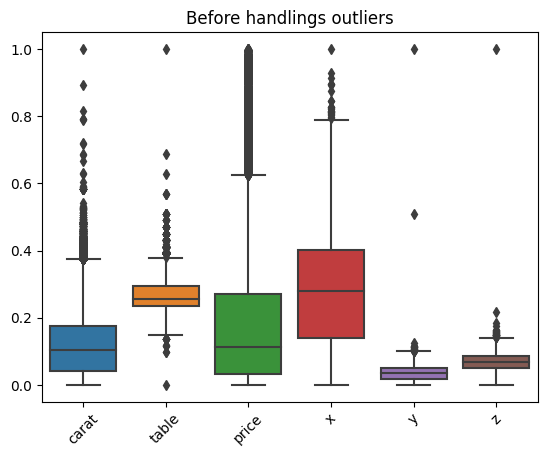

In [266]:
# Boxplot to identify outliers in the dataset.
plt.title('Before handlings outliers')
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

it is observed that there are points that fall significantly outside th eexpected range of values, which are considered to be outlirs.

### identifying skewness to impute outliers accordingly

In [267]:
skewness = df.skew()

# Print skewness values for each feature
print(skewness)

carat    1.118944
table    0.811419
price    1.618631
x        0.396856
y        2.664290
z        1.705073
dtype: float64


<ipython-input-267-04a20e7d03a7>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


distribution of data is analysed based on skewness, skewness >> 0 indicates that the data is right skewed. in our case, 'carat', 'price', 'x', 'y', 'z' has right skewed data. Table has comparetively even distributed data. positive skewed data suggests that there are extremly high values or outliers in the data.

## **Handling Outliers**

In [268]:
# considerin numerical columns
numeric_columns = df.select_dtypes(include = ['int','float'])
outlier_df = df.copy()
for c in numeric_columns:
  # initializing first and third quartiles
  Q1 = df[c].quantile(0.25)
  Q3 = df[c].quantile(0.75)
  # calculating inter quartile range with upper an lower bounds
  IQR = Q3-Q1
  lower_bound = Q1 - (1.25* IQR)
  upper_bound = Q3 + (1.25 * IQR)
  skewness = df[c].skew()
  # based on skewness threshold value, we impute outliers with median and mean
  if abs(skewness) >= 1:
    outlier_df[c] = outlier_df[c].apply(lambda a: df[c].median() if ((a < lower_bound) | (a > upper_bound)) else a)
  else:
    outlier_df[c] = outlier_df[c].apply(lambda a: df[c].mean() if ((a < lower_bound) | (a > upper_bound)) else a)
df = outlier_df
df

,carat,cut,color,clarity,table,price,x,y,z
0,0.006237,IDEAL,E,SI2,0.215686,0.000000,0.031384,0.005433,0.033564
1,0.002079,PREMIUM,E,SI1,0.333333,0.000000,0.022825,0.002898,0.029615
2,0.006237,GOOD,E,VS1,0.263806,0.000054,0.045649,0.007063,0.029615
3,0.018711,PREMIUM,I,VS2,0.274510,0.000433,0.067047,0.009960,0.040145
4,0.022869,GOOD,J,SI2,0.274510,0.000487,0.087019,0.012133,0.044093
...,...,...,...,...,...,...,...,...,...
53935,0.108108,IDEAL,D,SI1,0.254902,0.131427,0.288160,0.037668,0.068773
53936,0.108108,GOOD,D,SI1,0.215686,0.131427,0.279601,0.037486,0.072392
53937,0.103950,VERY GOOD,D,SI1,0.313725,0.131427,0.275321,0.036219,0.070747
53938,0.137214,PREMIUM,H,SI2,0.274510,0.131427,0.345221,0.044187,0.076670


## **Visualizing the handled outliers**

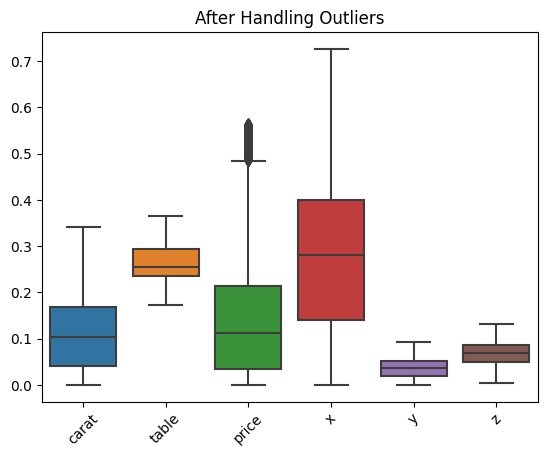

In [269]:
plt.title('After Handling Outliers')
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

## **Descriptive statistics of cleaned dataset.**

In [270]:
df.describe()

,carat,table,price,x,y,z
count,48812.000000,48812.000000,48812.000000,48812.000000,48812.000000,48812.000000
mean,0.111994,0.261128,0.142052,0.284724,0.037089,0.069922
std,0.079528,0.038559,0.132393,0.158509,0.019988,0.022536
min,0.000000,0.172549,0.000000,0.000000,0.000000,0.003949
25%,0.041580,0.235294,0.033668,0.139800,0.018834,0.049358
50%,0.103950,0.254902,0.112072,0.281027,0.036762,0.069760
75%,0.168399,0.294118,0.214210,0.399786,0.051612,0.086213
max,0.340956,0.364706,0.565227,0.726106,0.092539,0.132280


## **DATA VISUALIZATION**

**pair plot visualization of numerical features with price (Target).**

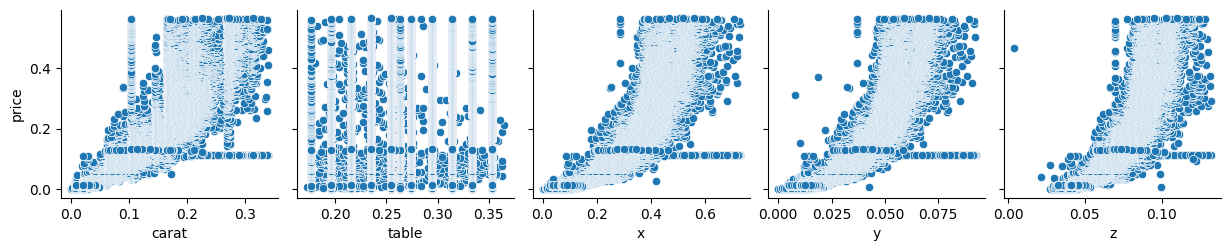

In [271]:
sns.pairplot(df, x_vars=['carat','table','x','y','z'], y_vars=['price'], kind='scatter')
plt.show()

### **Scatter plot visualization of price depending on carat**

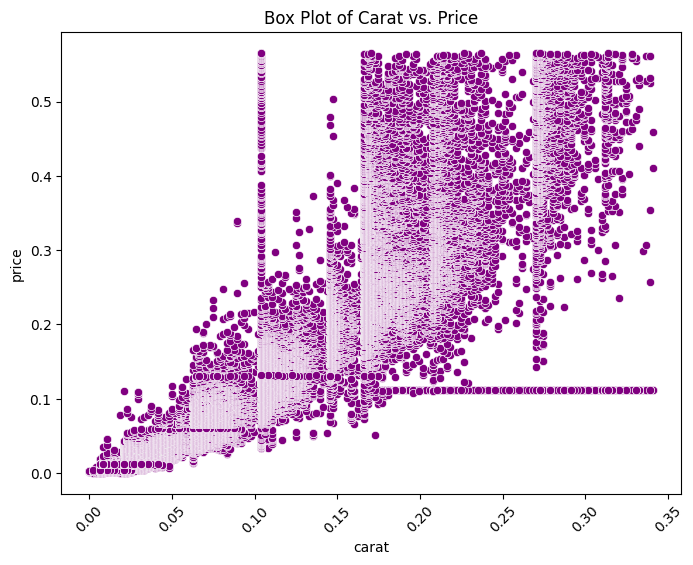

In [272]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=df, color = 'purple')
plt.title("Box Plot of Carat vs. Price")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

we see an exponential variation of carat with price. we observe a drastic chnage of diamond count and price range at the carat value ~ 0.18

### **Box Plot visualization of price depending on color of diamond.**

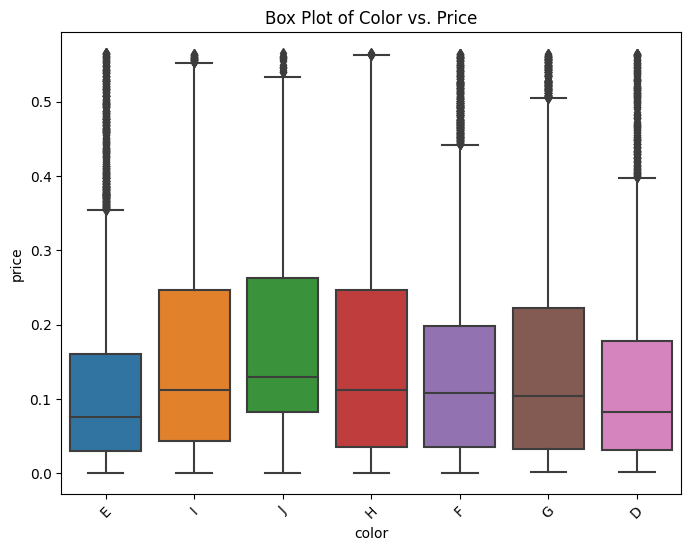

In [273]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='price', data=df)
plt.title("Box Plot of Color vs. Price")
plt.xticks(rotation=45)
plt.show()

Most expensive diamond is observed in color 'J', while the cheapest of all is observed in color 'E'

### **Hist plot visualization of diamonds based on cut for various colors**

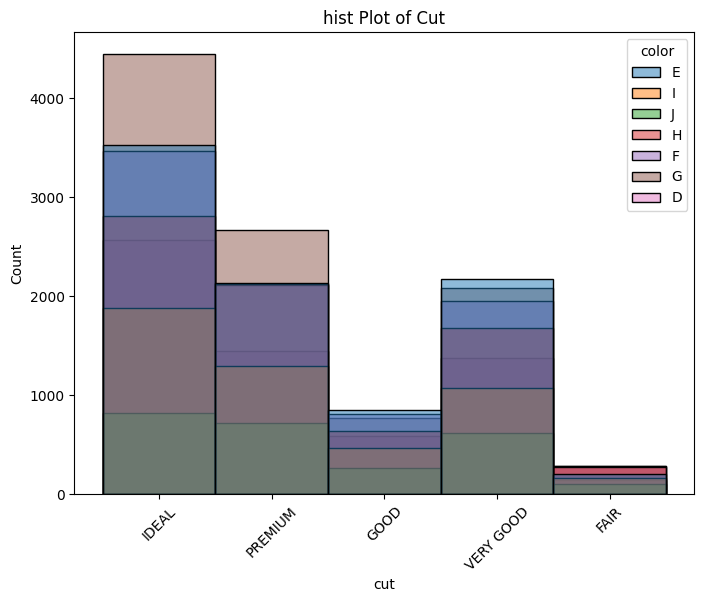

In [274]:
plt.figure(figsize=(8, 6))
sns.histplot(x='cut', hue = 'color', data=df)
plt.title("hist Plot of Cut")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

for every type of cut in diamond, J colored diamonds are observed to be in less count. IDEAL cut diamonds are of hihest frequency and FAIR being the least.

### **Scatter plot visualization between "X"(length), "Y"(width) ,"Z"(depth) and price**

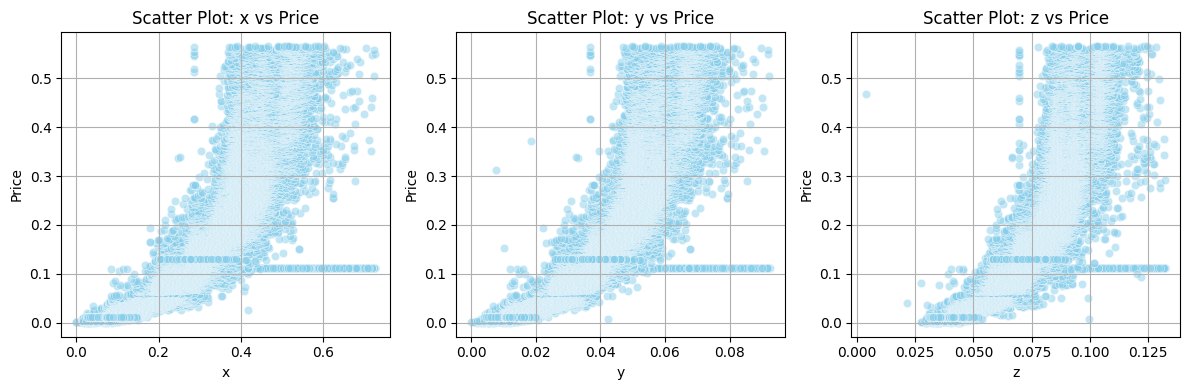

In [275]:



# Select the features to plot
features = ["x", "y", "z"]

# Create scatter plots using Seaborn
plt.figure(figsize=(12, 4))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y="price", color='skyblue', alpha=0.5)
    plt.title(f"Scatter Plot: {feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

The above plots give the relation between length and price ,width and price and depth and price from diamond dataset.We can observe that all three dimensions are exponentially dependent on the prices We can see that length has more impact on the price of diamond than width and depth.

# **Data Distribution**

## **Skewed visualization of features**

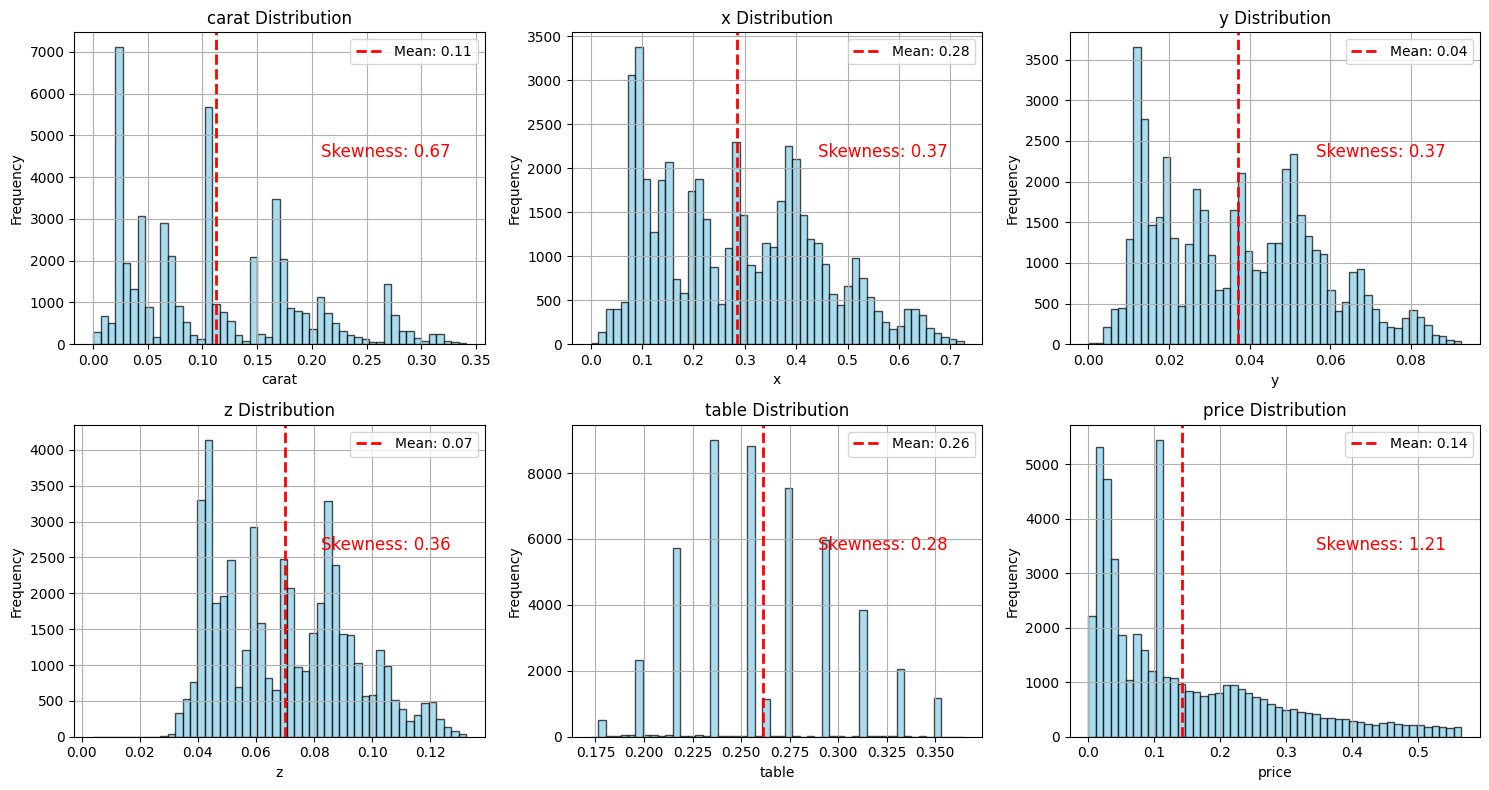

In [276]:
features = ["carat", "x", "y", "z", "table", "price"]

# Create subplots for skewness plots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, feature in enumerate(features):
    # Create a histogram plot for each feature
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    ax.hist(df[feature], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f"{feature} Distribution")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.grid(True)

    # Calculate and plot the mean line
    mean_value = df[feature].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")

    # Show skewness value on the plot
    skewness = df[feature].skew()
    ax.text(0.6, 0.6, f"Skewness: {skewness:.2f}", transform=ax.transAxes, fontsize=12, color='red')

    # Add a legend
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Skewness in the above plots depicts that the data is not symmetrically distributed around its mean for skewness very large than 0. we can observe 'table' distribution is almost evenly spread, due to its skewness(0.26) being close to 0. where as 'price' is right skewed due to its high skewness of 1.21

## **Categorical Data analysis**

<ipython-input-277-03468fbc565b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(frequency_distribution[feature], rotation=45)
<ipython-input-277-03468fbc565b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(frequency_distribution[feature], rotation=45)
<ipython-input-277-03468fbc565b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(frequency_distribution[feature], rotation=45)


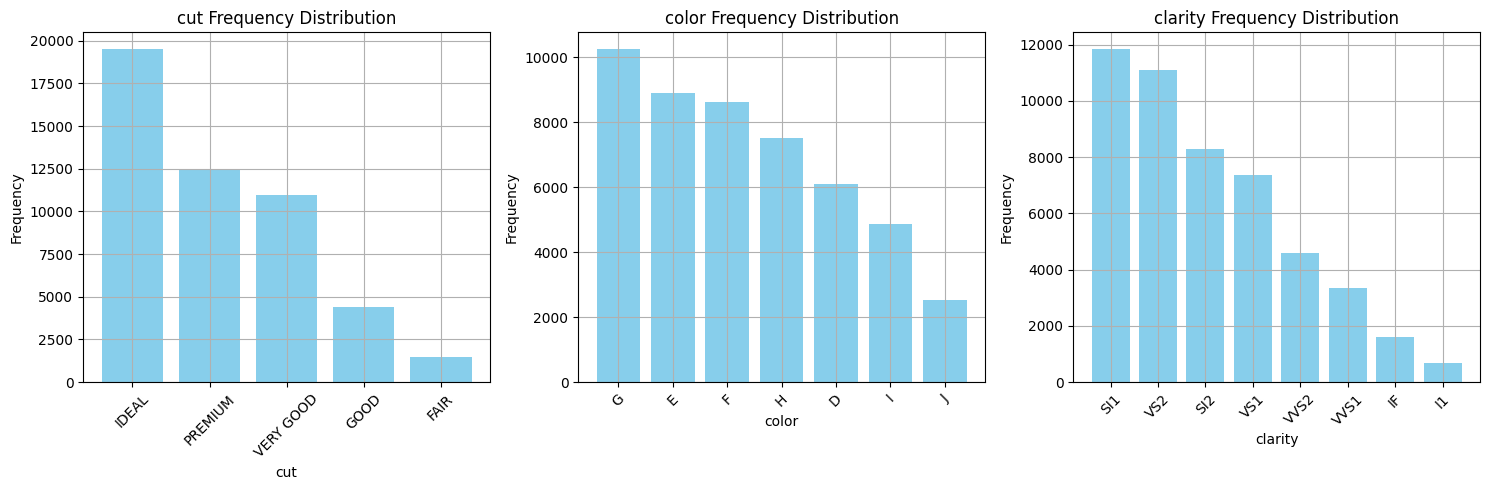

In [277]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the categorical features to analyze
categorical_features = ["cut", "color", "clarity"]

# Create subplots for frequency distributions of multiple features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(categorical_features):
    # Calculate the frequency distribution for the current feature
    frequency_distribution = df[feature].value_counts().reset_index()
    frequency_distribution.columns = [feature, "Frequency"]

    # Create a bar chart for the current feature
    ax = axes[i]
    ax.bar(frequency_distribution[feature], frequency_distribution["Frequency"], color='skyblue')
    ax.set_title(f"{feature} Frequency Distribution")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.set_xticklabels(frequency_distribution[feature], rotation=45)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

The above plots are the frequency distribution bar charts for the categorical features "color" "cut" "clarity".

From the "cut" frequency distribution we can identify that "IDEAL" diamond is of highest frequency and "FAIR" is of least frequency.

From "clarity" frequency distribution we can identify that "SI1"(Slightly included) is of highest frequency and "I1"(Included) is of lowest frequency.

From "color" frequency distribution we can identify that color "G" is of highest frequency and "J" is of lowest frequency.